In [170]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import numpy as np
import scipy as sp
import pandas as pd
import random
import json
import os
import math

In [175]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"],dtype=np.float64)
    Z = np.array(data["melspec"],dtype=np.float64)
    y = np.array(data["labels"])
    mp = data['mapping']
    print("Data succesfully loaded!")

    return  X, y,Z,mp






def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [173]:
def plot_sample(x,sr):
    if(x.shape[0] > x.shape[1]):
        x =  x.T
    librosa.display.specshow(x, sr=sr, x_axis='time',y_axis="log")
    plt.colorbar(format='%+2.f')  

In [174]:
# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = "data_10.json"

# Audio hyperparamters
sr = 22050

In [176]:

# load data
X, y,Z,mp = load_data(DATA_PATH)

Data succesfully loaded!


In [177]:
used = set()
label = [x for x in mp if x not in used and (used.add(x) or True)]

In [194]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3,shuffle=True)

In [195]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),
    # output layer
    keras.layers.Dense(13, activation='softmax')
])

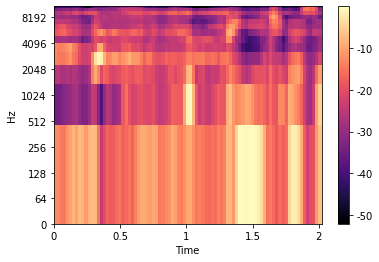

In [196]:
plot_sample(Z[random.randint(0,len(X))],sr)

In [197]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 1131)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               579584    
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_30 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_31 (Dense)             (None, 13)                845       
Total params: 728,205
Trainable params: 728,205
Non-trainable params: 0
_________________________________________________________________


In [198]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
65/65 [==============================] - 1s 12ms/step - loss: 12.8051 - accuracy: 0.1717 - val_loss: 2.5039 - val_accuracy: 0.1477
Epoch 2/50
65/65 [==============================] - 1s 9ms/step - loss: 2.6195 - accuracy: 0.1812 - val_loss: 2.5485 - val_accuracy: 0.2920
Epoch 3/50
65/65 [==============================] - 1s 9ms/step - loss: 2.5358 - accuracy: 0.2795 - val_loss: 2.5110 - val_accuracy: 0.3236
Epoch 4/50
65/65 [==============================] - 1s 10ms/step - loss: 2.5154 - accuracy: 0.2809 - val_loss: 2.4955 - val_accuracy: 0.3179
Epoch 5/50
65/65 [==============================] - 1s 10ms/step - loss: 2.5004 - accuracy: 0.3152 - val_loss: 2.5339 - val_accuracy: 0.2886
Epoch 6/50
65/65 [==============================] - 1s 9ms/step - loss: 2.5307 - accuracy: 0.2857 - val_loss: 2.4609 - val_accuracy: 0.3202
Epoch 7/50
65/65 [==============================] - 1s 9ms/step - loss: 2.4321 - accuracy: 0.3138 - val_loss: 2.4372 - val_accuracy: 0.3224
Epoch 8/50
65/65

In [128]:


# We are building another model to solve the overfitting problem

In [199]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(13, activation='softmax')
])

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 1131)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               579584    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)              

Epoch 1/100
65/65 [==============================] - 2s 18ms/step - loss: 38.8854 - accuracy: 0.1103 - val_loss: 3.5509 - val_accuracy: 0.2864
Epoch 2/100
65/65 [==============================] - 1s 14ms/step - loss: 9.6458 - accuracy: 0.1174 - val_loss: 3.4020 - val_accuracy: 0.2086
Epoch 3/100
65/65 [==============================] - 1s 13ms/step - loss: 5.0948 - accuracy: 0.1580 - val_loss: 3.3312 - val_accuracy: 0.2503
Epoch 4/100
65/65 [==============================] - 1s 14ms/step - loss: 3.9584 - accuracy: 0.1493 - val_loss: 3.2778 - val_accuracy: 0.3055
Epoch 5/100
65/65 [==============================] - 1s 12ms/step - loss: 3.5971 - accuracy: 0.1635 - val_loss: 3.2745 - val_accuracy: 0.2390
Epoch 6/100
65/65 [==============================] - 1s 11ms/step - loss: 3.4893 - accuracy: 0.1625 - val_loss: 3.2375 - val_accuracy: 0.3134
Epoch 7/100
65/65 [==============================] - 1s 15ms/step - loss: 3.4064 - accuracy: 0.2197 - val_loss: 3.1693 - val_accuracy: 0.3202
Epoch

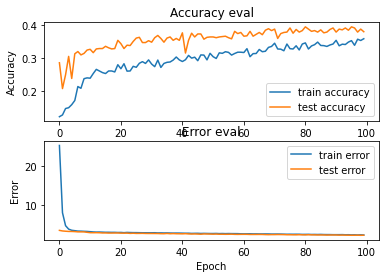

In [200]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

# plot accuracy and error as a function of the epochs
plot_history(history)

In [201]:
def normalize(train, test): 
    mu, sigma = train.mean(),train.std()
    train = (train - mu) / sigma 
    mu, sigma = test.mean(),test.std()
    test = (test - mu) / sigma 
    return train, test 

In [202]:
train,test = normalize(X_train, X_test)

Epoch 1/100
65/65 [==============================] - 1s 12ms/step - loss: 2.5150 - accuracy: 0.2959 - val_loss: 2.3325 - val_accuracy: 0.3517
Epoch 2/100
65/65 [==============================] - 1s 13ms/step - loss: 2.4283 - accuracy: 0.3196 - val_loss: 2.2992 - val_accuracy: 0.3574
Epoch 3/100
65/65 [==============================] - 1s 13ms/step - loss: 2.4152 - accuracy: 0.3245 - val_loss: 2.2839 - val_accuracy: 0.3506
Epoch 4/100
65/65 [==============================] - 1s 11ms/step - loss: 2.3744 - accuracy: 0.3293 - val_loss: 2.2702 - val_accuracy: 0.3619
Epoch 5/100
65/65 [==============================] - 1s 12ms/step - loss: 2.3551 - accuracy: 0.3414 - val_loss: 2.2406 - val_accuracy: 0.3901
Epoch 6/100
65/65 [==============================] - 1s 11ms/step - loss: 2.3237 - accuracy: 0.3477 - val_loss: 2.2181 - val_accuracy: 0.3856
Epoch 7/100
65/65 [==============================] - 1s 17ms/step - loss: 2.3139 - accuracy: 0.3549 - val_loss: 2.2142 - val_accuracy: 0.3811
Epoch 

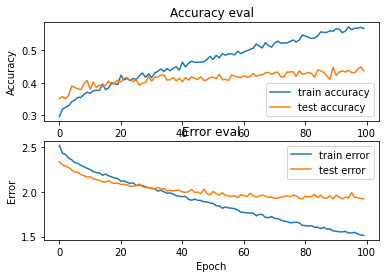

In [203]:
# train model
history = model.fit(train, y_train, validation_data=(test, y_test), batch_size=32, epochs=100)

# plot accuracy and error as a function of the epochs
plot_history(history)

# Working with CNN

In [204]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y,Z,_ = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [205]:
def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(13, activation='softmax'))

    return model

In [206]:
def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


In [207]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

Data succesfully loaded!


In [208]:
# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 85, 11, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 43, 6, 32)         0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 43, 6, 32)         128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 41, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 21, 2, 32)         0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 21, 2, 32)         128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 1, 32)       

In [209]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
56/56 [==============================] - 2s 26ms/step - loss: 2.9003 - accuracy: 0.1547 - val_loss: 2.7100 - val_accuracy: 0.0563
Epoch 2/30
56/56 [==============================] - 1s 20ms/step - loss: 2.4202 - accuracy: 0.2374 - val_loss: 2.3244 - val_accuracy: 0.2500
Epoch 3/30
56/56 [==============================] - 1s 16ms/step - loss: 2.2754 - accuracy: 0.2539 - val_loss: 2.0722 - val_accuracy: 0.3311
Epoch 4/30
56/56 [==============================] - 2s 33ms/step - loss: 2.1018 - accuracy: 0.2980 - val_loss: 1.9412 - val_accuracy: 0.3266
Epoch 5/30
56/56 [==============================] - 1s 15ms/step - loss: 2.0162 - accuracy: 0.3107 - val_loss: 1.8888 - val_accuracy: 0.3423
Epoch 6/30
56/56 [==============================] - 1s 16ms/step - loss: 1.9563 - accuracy: 0.3428 - val_loss: 1.8572 - val_accuracy: 0.3423
Epoch 7/30
56/56 [==============================] - 1s 19ms/step - loss: 1.9427 - accuracy: 0.3264 - val_loss: 1.8335 - val_accuracy: 0.3491
Epoch 8/30
56

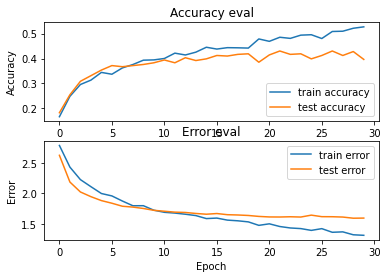

In [151]:
# plot accuracy/error for training and validation
plot_history(history)

In [210]:
# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

# predict sample
predict(model, X_to_predict, y_to_predict)

24/24 - 0s - loss: 1.6254 - accuracy: 0.3897

Test accuracy: 0.3897158205509186
Target: 10, Predicted label: [12]
